# Example analysis

This notebook provides a generic example for some analysis that you might want to conduct with the data provided through this AFQ-Browser instance. Note that this is just an example, and not may be a good approach to the data in this particular instance of the AFQ-Browser, and this data-set. Ultimately, the limits of the analysis you could do are the limits of your imagination.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [5]:
subjects = pd.read_csv('/home/romain/Téléchargements/AFQ-Browser-MSexample/data/subjects.csv')

In [6]:
nodes = pd.read_csv('/home/romain/Téléchargements/AFQ-Browser-MSexample/data/nodes.csv')

### Merging nodes and subjects

The data from nodes (referring to diffusion statistics along the length of the tracts) can be merged together with the data about subjects into one table:

In [7]:
merged = pd.merge(nodes, subjects, on="subjectID")

In [9]:
merged.head()

,subjectID,tractID,nodeID,rd,fa,cl,ad,md,Unnamed: 0,Age,MultipleSclerosis
0,subject_000,Left Thalamic Radiation,0,0.639790,0.175817,0.079779,0.845680,0.708420,0,31.0,0
1,subject_000,Left Thalamic Radiation,1,0.596359,0.236110,0.114359,0.871626,0.688115,0,31.0,0
2,subject_000,Left Thalamic Radiation,2,0.549951,0.313873,0.159899,0.914309,0.671403,0,31.0,0
3,subject_000,Left Thalamic Radiation,3,0.516762,0.366981,0.191475,0.941699,0.658408,0,31.0,0
4,subject_000,Left Thalamic Radiation,4,0.500628,0.390761,0.205170,0.952743,0.651333,0,31.0,0


### Visualizing the data 

You can use [Matplotlib](http://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/)  to visualize the data:

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

We focus on the calculated diffusion statistics that are included in the `nodes` table:

In [11]:
stats = nodes.columns.drop(["subjectID", "tractID", "nodeID"])

And specifically on the very first one

In [12]:
print(stats[0])

rd


In [14]:
stat = merged[["nodeID", "subjectID", "tractID", stats[0]]]

Select a single tract:

In [15]:
tract_stat = stat[stat["tractID"] == stat["tractID"].values[0]]

In [16]:
tract_stat.head()

,nodeID,subjectID,tractID,rd
0,0,subject_000,Left Thalamic Radiation,0.639790
1,1,subject_000,Left Thalamic Radiation,0.596359
2,2,subject_000,Left Thalamic Radiation,0.549951
3,3,subject_000,Left Thalamic Radiation,0.516762
4,4,subject_000,Left Thalamic Radiation,0.500628


In [17]:
tract_p = tract_stat.pivot(index='nodeID', columns='subjectID', values=stats[0]) 

In [18]:
import numpy as np

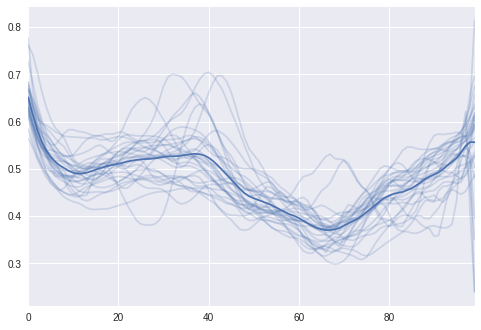

In [19]:
sns.tsplot(tract_p.values.T, err_style="unit_traces", estimator=np.nanmean)

### Analyzing data 

As an example of one approach to AFQ data, we include here an example of how you might use [Scikit Learn's implementation of the K-means algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to cluster the subjects in these data into two clusters, based on this statistic/tract combination.

In [20]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

We create a pipeline that imputes nan values (that sometimes occur in tract profiles), and clusters the results into two clusters:

In [21]:
estimator = Pipeline([("impute", Imputer()), ("cluster", KMeans(n_clusters=2))])

We compute the clusters and transform the data into cluster distance space

In [22]:
clusters = estimator.fit(tract_p.values.T).steps[1][1]

In [23]:
labels = clusters.labels_

In [24]:
x, y = estimator.fit_transform(tract_p.values.T).T

We plot the results in the latent cluster space

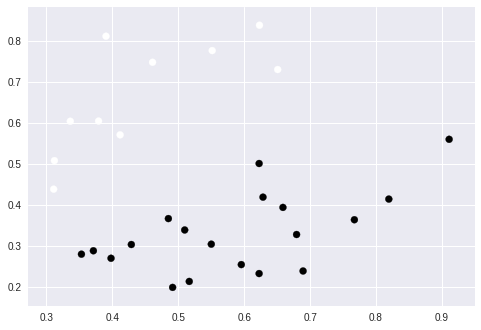

In [25]:
plt.scatter(x, y, c=labels.astype(np.float))